In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import calendar
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import wbdata
import datetime

In [4]:
ticker = "1155.KL"
actual_data = yf.download(ticker, start="2004-07-01", end="2024-08-01")
actual_data.info()

[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4972 entries, 2004-07-01 to 2024-07-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4972 non-null   float64
 1   High       4972 non-null   float64
 2   Low        4972 non-null   float64
 3   Close      4972 non-null   float64
 4   Adj Close  4972 non-null   float64
 5   Volume     4972 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 271.9 KB


In [5]:
actual_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000,4.972000e+03
mean,8.472266,8.527618,8.419473,8.474965,4.719870,8.344831e+06
std,1.123968,1.119108,1.129090,1.124700,1.859835,6.351584e+06
min,3.556369,3.574331,3.538408,3.574331,1.410369,0.000000e+00
25%,8.030000,8.070000,7.974889,8.030000,3.016903,4.591000e+06
50%,8.620000,8.660000,8.560000,8.620000,4.631227,7.077000e+06
75%,9.110000,9.160000,9.060000,9.120000,6.061804,1.042262e+07
max,10.880000,11.080000,10.820000,10.880000,9.949086,1.675338e+08


In [6]:
gdp_data = pd.read_csv('C:/Users/kh/Desktop/mbb_stock_prediction_analysis/data/MY_gdp_usd.csv')
opr_data = pd.read_csv('C:/Users/kh/Desktop/mbb_stock_prediction_analysis/data/MY_opr.csv')
mbb_data = pd.read_csv('C:/Users/kh/Desktop/mbb_stock_prediction_analysis/data/MY_mbb.csv', index_col='Date')


In [14]:
gdp_data = gdp_data.rename(columns={'GDP (constant 2015 US$)':'GDP (constant 2015 MYR)'})
gdp_data['GDP (constant 2015 MYR)'] = gdp_data['GDP (constant 2015 MYR)'] * 4.5
gdp_data.head()

,Year,GDP (constant 2015 MYR),GDP Growth YOY (%),Inflation Rate (%)
0,2004,7.965000e+11,6.783438,1.421271
1,2005,8.415000e+11,5.332139,2.975071
2,2006,8.865000e+11,5.584847,3.609236
3,2007,9.450000e+11,6.298786,2.027353
4,2008,9.900000e+11,4.831770,5.440782


In [7]:
gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     20 non-null     int64  
 1   GDP (constant 2015 US$)  20 non-null     float64
 2   GDP Growth YOY (%)       20 non-null     float64
 3   Inflation Rate (%)       20 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 768.0 bytes


In [9]:
gdp_data.describe()

,Year,GDP (constant 2015 US$),GDP Growth YOY (%),Inflation Rate (%)
count,20.00000,2.000000e+01,20.000000,20.000000
mean,2013.50000,2.827000e+11,4.549592,2.229282
std,5.91608,7.073680e+10,3.075074,1.421527
min,2004.00000,1.770000e+11,-5.456847,-1.138702
25%,2008.75000,2.192500e+11,4.440633,1.572457
50%,2013.50000,2.790000e+11,5.192723,2.104701
75%,2018.25000,3.460000e+11,5.861222,3.150861
max,2023.00000,4.010000e+11,8.650344,5.440782


In [16]:
opr_data = opr_data.rename(columns={'date':'Date'})
opr_data.head()

,Date,OPR (%)
0,2004-05-01,2.7
1,2004-06-01,2.7
2,2004-07-01,2.7
3,2004-08-01,2.7
4,2004-09-01,2.7


In [8]:
opr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     245 non-null    object 
 1   OPR (%)  245 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [10]:
opr_data.describe()

,OPR (%)
count,245.000000
mean,2.864082
std,0.509294
min,1.750000
25%,2.700000
50%,3.000000
75%,3.250000
max,3.500000


In [23]:
gdp_data['Date'] = pd.to_datetime(gdp_data['Year'].astype(str) + '-01-01')  # Set date as the first day of each year
gdp_data.set_index('Date', inplace=True)
gdp_data = gdp_data.drop(columns=['Year'])
gdp_data

,GDP (constant 2015 US$),GDP Growth YOY (%),Inflation Rate (%)
Date,,,
2004-01-01,1.770000e+11,6.783438,1.421271
2005-01-01,1.870000e+11,5.332139,2.975071
2006-01-01,1.970000e+11,5.584847,3.609236
2007-01-01,2.100000e+11,6.298786,2.027353
2008-01-01,2.200000e+11,4.831770,5.440782
2009-01-01,2.170000e+11,-1.513529,0.583308
2010-01-01,2.330000e+11,7.424847,1.622852
2011-01-01,2.450000e+11,5.293913,3.174471
2012-01-01,2.580000e+11,5.473454,1.663571


In [24]:
# exchange_rate_to_myr = 4.5  # Example exchange rate from USD to MYR

# # Multiply the relevant columns by the exchange rate
# gdp_data['GDP (constant 2015 US$)'] *= exchange_rate_to_myr
# gdp_data = gdp_data.rename(columns={'GDP (constant 2015 US$)':'GDP (constant 2015 MYR)'})

In [25]:
date_range = pd.date_range(start='2004-01-01', end='2024-08-01', freq='D')
gdp_data = gdp_data.reindex(date_range).ffill()
gdp_data

,GDP (constant 2015 MYR),GDP Growth YOY (%),Inflation Rate (%)
2004-01-01,7.965000e+11,6.783438,1.421271
2004-01-02,7.965000e+11,6.783438,1.421271
2004-01-03,7.965000e+11,6.783438,1.421271
2004-01-04,7.965000e+11,6.783438,1.421271
2004-01-05,7.965000e+11,6.783438,1.421271
...,...,...,...
2024-07-28,1.804500e+12,3.680282,2.488866
2024-07-29,1.804500e+12,3.680282,2.488866
2024-07-30,1.804500e+12,3.680282,2.488866
2024-07-31,1.804500e+12,3.680282,2.488866


In [26]:
dr = pd.date_range(start='2004-07-01', end='2024-08-01', freq='D')


In [27]:
gdp_data_dr = gdp_data.reindex(dr)
gdp_data_dr = gdp_data_dr.iloc[:-1]
gdp_data_dr

,GDP (constant 2015 MYR),GDP Growth YOY (%),Inflation Rate (%)
2004-07-01,7.965000e+11,6.783438,1.421271
2004-07-02,7.965000e+11,6.783438,1.421271
2004-07-03,7.965000e+11,6.783438,1.421271
2004-07-04,7.965000e+11,6.783438,1.421271
2004-07-05,7.965000e+11,6.783438,1.421271
...,...,...,...
2024-07-27,1.804500e+12,3.680282,2.488866
2024-07-28,1.804500e+12,3.680282,2.488866
2024-07-29,1.804500e+12,3.680282,2.488866
2024-07-30,1.804500e+12,3.680282,2.488866


In [28]:
opr_data['Date'] = pd.to_datetime(opr_data['date'])
opr_data.set_index('Date', inplace=True)
opr_data = opr_data.drop(columns=['date'])
opr_data_dr = opr_data.reindex(dr).ffill()
opr_data_dr = opr_data_dr.iloc[:-1]
opr_data_dr

,OPR (%)
2004-07-01,2.7
2004-07-02,2.7
2004-07-03,2.7
2004-07-04,2.7
2004-07-05,2.7
...,...
2024-07-27,3.0
2024-07-28,3.0
2024-07-29,3.0
2024-07-30,3.0


In [29]:
mbb_data.index.name = None
mbb_data

,Open,High,Low,Close,Adj Close,Volume
2004-07-01,7.256431,7.328277,7.184585,7.256431,2.196594,2016957.0
2004-07-02,7.256431,7.328277,7.184585,7.328277,2.218341,1104447.0
2004-07-03,7.256431,7.615660,7.256431,7.543814,2.283586,5489669.0
2004-07-04,7.256431,7.615660,7.256431,7.543814,2.283586,5489669.0
2004-07-05,7.256431,7.615660,7.256431,7.543814,2.283586,5489669.0
...,...,...,...,...,...,...
2024-07-27,10.140000,10.200000,10.140000,10.200000,9.929616,6957200.0
2024-07-28,10.140000,10.200000,10.140000,10.200000,9.929616,6957200.0
2024-07-29,10.140000,10.200000,10.140000,10.200000,9.929616,6957200.0
2024-07-30,10.240000,10.260000,10.080000,10.080000,9.812798,14123900.0


In [30]:
dataframes = [gdp_data_dr, opr_data_dr, mbb_data]
for i, df in enumerate(dataframes, 1):
    print(f"Size of DataFrame {i}: {df.shape}")

Size of DataFrame 1: (7336, 3)
Size of DataFrame 2: (7336, 1)
Size of DataFrame 3: (7336, 6)


In [31]:
# Example: Combining the three DataFrames on their common index
combined_df = mbb_data.join([gdp_data_dr, opr_data_dr], how='inner')  # Use 'inner' to keep only rows with common index values across all

# Display the resulting combined DataFrame
combined_df.shape


(0, 10)

In [32]:
df1 = mbb_data.copy()
df2 = gdp_data_dr.copy()
df3 = opr_data_dr.copy()

In [33]:
print("df1 date range:", df1.index.min(), "to", df1.index.max())
print("df2 date range:", df2.index.min(), "to", df2.index.max())
print("df3 date range:", df3.index.min(), "to", df3.index.max())


df1 date range: 2004-07-01 to 2024-07-31
df2 date range: 2004-07-01 00:00:00 to 2024-07-31 00:00:00
df3 date range: 2004-07-01 00:00:00 to 2024-07-31 00:00:00


In [34]:
# Convert all indices to 'yyyy-mm-dd' format, removing any timestamp
df1.index = pd.to_datetime(df1.index).strftime('%Y-%m-%d')
df2.index = pd.to_datetime(df2.index).strftime('%Y-%m-%d')
df3.index = pd.to_datetime(df3.index).strftime('%Y-%m-%d')

# Convert index back to datetime format to allow proper merging
df1.index = pd.to_datetime(df1.index)
df2.index = pd.to_datetime(df2.index)
df3.index = pd.to_datetime(df3.index)


In [35]:
print("df1 date range:", df1.index.min(), "to", df1.index.max())
print("df2 date range:", df2.index.min(), "to", df2.index.max())
print("df3 date range:", df3.index.min(), "to", df3.index.max())


df1 date range: 2004-07-01 00:00:00 to 2024-07-31 00:00:00
df2 date range: 2004-07-01 00:00:00 to 2024-07-31 00:00:00
df3 date range: 2004-07-01 00:00:00 to 2024-07-31 00:00:00


In [36]:
combined_df = df1.join([df2, df3], how='inner')  # or 'outer' if you want all dates
print(combined_df.shape)

(7336, 10)


In [37]:
combined_df

,Open,High,Low,Close,Adj Close,Volume,GDP (constant 2015 MYR),GDP Growth YOY (%),Inflation Rate (%),OPR (%)
2004-07-01,7.256431,7.328277,7.184585,7.256431,2.196594,2016957.0,7.965000e+11,6.783438,1.421271,2.7
2004-07-02,7.256431,7.328277,7.184585,7.328277,2.218341,1104447.0,7.965000e+11,6.783438,1.421271,2.7
2004-07-03,7.256431,7.615660,7.256431,7.543814,2.283586,5489669.0,7.965000e+11,6.783438,1.421271,2.7
2004-07-04,7.256431,7.615660,7.256431,7.543814,2.283586,5489669.0,7.965000e+11,6.783438,1.421271,2.7
2004-07-05,7.256431,7.615660,7.256431,7.543814,2.283586,5489669.0,7.965000e+11,6.783438,1.421271,2.7
...,...,...,...,...,...,...,...,...,...,...
2024-07-27,10.140000,10.200000,10.140000,10.200000,9.929616,6957200.0,1.804500e+12,3.680282,2.488866,3.0
2024-07-28,10.140000,10.200000,10.140000,10.200000,9.929616,6957200.0,1.804500e+12,3.680282,2.488866,3.0
2024-07-29,10.140000,10.200000,10.140000,10.200000,9.929616,6957200.0,1.804500e+12,3.680282,2.488866,3.0
2024-07-30,10.240000,10.260000,10.080000,10.080000,9.812798,14123900.0,1.804500e+12,3.680282,2.488866,3.0


In [38]:
combined_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'GDP (constant 2015 MYR)', 'GDP Growth YOY (%)', 'Inflation Rate (%)',
       'OPR (%)'],
      dtype='object')

In [39]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7336 entries, 2004-07-01 to 2024-07-31
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Open                     7336 non-null   float64
 1   High                     7336 non-null   float64
 2   Low                      7336 non-null   float64
 3   Close                    7336 non-null   float64
 4   Adj Close                7336 non-null   float64
 5   Volume                   7336 non-null   float64
 6   GDP (constant 2015 MYR)  7336 non-null   float64
 7   GDP Growth YOY (%)       7336 non-null   float64
 8   Inflation Rate (%)       7336 non-null   float64
 9   OPR (%)                  7336 non-null   float64
dtypes: float64(10)
memory usage: 630.4 KB


In [40]:
combined_df.index.name = 'Date'
combined_df.to_csv("data/combined_df.csv")

In [20]:
# Moving Averages (MA)
combined_df['MA_50'] = combined_df['Close'].rolling(window=50).mean()
combined_df['MA_200'] = combined_df['Close'].rolling(window=200).mean()

# Exponential Moving Averages (EMA)
combined_df['EMA_50'] = combined_df['Close'].ewm(span=50, adjust=False).mean()
combined_df['EMA_200'] = combined_df['Close'].ewm(span=200, adjust=False).mean()

# Relative Strength Index (RSI)
window = 50  # Longer period for long-term analysis
delta = combined_df['Close'].diff(1)
gain = delta.where(delta > 0, 0).rolling(window=window).mean()
loss = -delta.where(delta < 0, 0).rolling(window=window).mean()
RS = gain / loss
combined_df['RSI_50'] = 100 - (100 / (1 + RS))

# Moving Average Convergence Divergence (MACD)
ema_fast = combined_df['Close'].ewm(span=26, adjust=False).mean()
ema_slow = combined_df['Close'].ewm(span=50, adjust=False).mean()
combined_df['MACD'] = ema_fast - ema_slow
combined_df['MACD_Signal'] = combined_df['MACD'].ewm(span=20, adjust=False).mean()

# Bollinger Bands
rolling_mean = combined_df['Close'].rolling(window=200).mean()
rolling_std = combined_df['Close'].rolling(window=200).std()
combined_df['BB_upper'] = rolling_mean + 2 * rolling_std
combined_df['BB_lower'] = rolling_mean - 2 * rolling_std

# Average True Range (ATR)
high_low = combined_df['High'] - combined_df['Low']
high_close = abs(combined_df['High'] - combined_df['Close'].shift(1))
low_close = abs(combined_df['Low'] - combined_df['Close'].shift(1))
true_range = high_low.combine(high_close, max).combine(low_close, max)
combined_df['ATR_200'] = true_range.rolling(window=200).mean()

# Lagged Features for Macroeconomic Indicators
macro_features = ['GDP (constant 2015 MYR)', 'Inflation Rate (%)', 'OPR (%)']
lags = [30, 90, 180, 365]  # Include a one-year lag for long-term analysis

for feature in macro_features:
    for lag in lags:
        combined_df[f'{feature}_Lag_{lag}D'] = combined_df[feature].shift(lag)

# Lagged Close Prices (useful for historical trend analysis)
lagged_periods = [30, 90, 180, 365]
for lag in lagged_periods:
    combined_df[f'Lagged_Close_{lag}D'] = combined_df['Close'].shift(lag)

# Drop NaNs caused by lagged and rolling calculations
combined_df.dropna(inplace=True)

# Confirm new features added
print("Updated DataFrame columns:")
print(combined_df.columns)


Updated DataFrame columns:
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'GDP (constant 2015 MYR)', 'GDP Growth YOY (%)', 'Inflation Rate (%)',
       'OPR (%)', 'MA_50', 'MA_200', 'EMA_50', 'EMA_200', 'RSI_50', 'MACD',
       'MACD_Signal', 'BB_upper', 'BB_lower', 'ATR_200',
       'GDP (constant 2015 MYR)_Lag_30D', 'GDP (constant 2015 MYR)_Lag_90D',
       'GDP (constant 2015 MYR)_Lag_180D', 'GDP (constant 2015 MYR)_Lag_365D',
       'Inflation Rate (%)_Lag_30D', 'Inflation Rate (%)_Lag_90D',
       'Inflation Rate (%)_Lag_180D', 'Inflation Rate (%)_Lag_365D',
       'OPR (%)_Lag_30D', 'OPR (%)_Lag_90D', 'OPR (%)_Lag_180D',
       'OPR (%)_Lag_365D', 'Lagged_Close_30D', 'Lagged_Close_90D',
       'Lagged_Close_180D', 'Lagged_Close_365D'],
      dtype='object')


In [21]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6971 entries, 2005-07-01 to 2024-07-31
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Open                              6971 non-null   float64
 1   High                              6971 non-null   float64
 2   Low                               6971 non-null   float64
 3   Close                             6971 non-null   float64
 4   Adj Close                         6971 non-null   float64
 5   Volume                            6971 non-null   float64
 6   GDP (constant 2015 MYR)           6971 non-null   float64
 7   GDP Growth YOY (%)                6971 non-null   float64
 8   Inflation Rate (%)                6971 non-null   float64
 9   OPR (%)                           6971 non-null   float64
 10  MA_50                             6971 non-null   float64
 11  MA_200                            6971 non-null   f

In [22]:
combined_df.tail()

,Open,High,Low,Close,Adj Close,Volume,GDP (constant 2015 MYR),GDP Growth YOY (%),Inflation Rate (%),OPR (%),...,Inflation Rate (%)_Lag_180D,Inflation Rate (%)_Lag_365D,OPR (%)_Lag_30D,OPR (%)_Lag_90D,OPR (%)_Lag_180D,OPR (%)_Lag_365D,Lagged_Close_30D,Lagged_Close_90D,Lagged_Close_180D,Lagged_Close_365D
2024-07-27,10.14,10.20,10.14,10.20,9.929616,6957200.0,1.804500e+12,3.680282,2.488866,3.0,...,2.488866,2.488866,3.0,3.0,3.0,3.0,9.96,9.75,9.23,8.99
2024-07-28,10.14,10.20,10.14,10.20,9.929616,6957200.0,1.804500e+12,3.680282,2.488866,3.0,...,2.488866,2.488866,3.0,3.0,3.0,3.0,9.96,9.75,9.24,9.02
2024-07-29,10.14,10.20,10.14,10.20,9.929616,6957200.0,1.804500e+12,3.680282,2.488866,3.0,...,2.488866,2.488866,3.0,3.0,3.0,3.0,9.97,9.73,9.26,9.02
2024-07-30,10.24,10.26,10.08,10.08,9.812798,14123900.0,1.804500e+12,3.680282,2.488866,3.0,...,2.488866,2.488866,3.0,3.0,3.0,3.0,9.97,9.78,9.34,9.02
2024-07-31,10.10,10.22,10.08,10.22,9.949086,12304400.0,1.804500e+12,3.680282,2.488866,3.0,...,2.488866,2.488866,3.0,3.0,3.0,3.0,9.97,9.78,9.34,8.99


In [23]:
print(list(combined_df))

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'GDP (constant 2015 MYR)', 'GDP Growth YOY (%)', 'Inflation Rate (%)', 'OPR (%)', 'MA_50', 'MA_200', 'EMA_50', 'EMA_200', 'RSI_50', 'MACD', 'MACD_Signal', 'BB_upper', 'BB_lower', 'ATR_200', 'GDP (constant 2015 MYR)_Lag_30D', 'GDP (constant 2015 MYR)_Lag_90D', 'GDP (constant 2015 MYR)_Lag_180D', 'GDP (constant 2015 MYR)_Lag_365D', 'Inflation Rate (%)_Lag_30D', 'Inflation Rate (%)_Lag_90D', 'Inflation Rate (%)_Lag_180D', 'Inflation Rate (%)_Lag_365D', 'OPR (%)_Lag_30D', 'OPR (%)_Lag_90D', 'OPR (%)_Lag_180D', 'OPR (%)_Lag_365D', 'Lagged_Close_30D', 'Lagged_Close_90D', 'Lagged_Close_180D', 'Lagged_Close_365D']


In [24]:
combined_df.index.name = 'Date'
combined_df.to_csv("data/combined_df.csv")

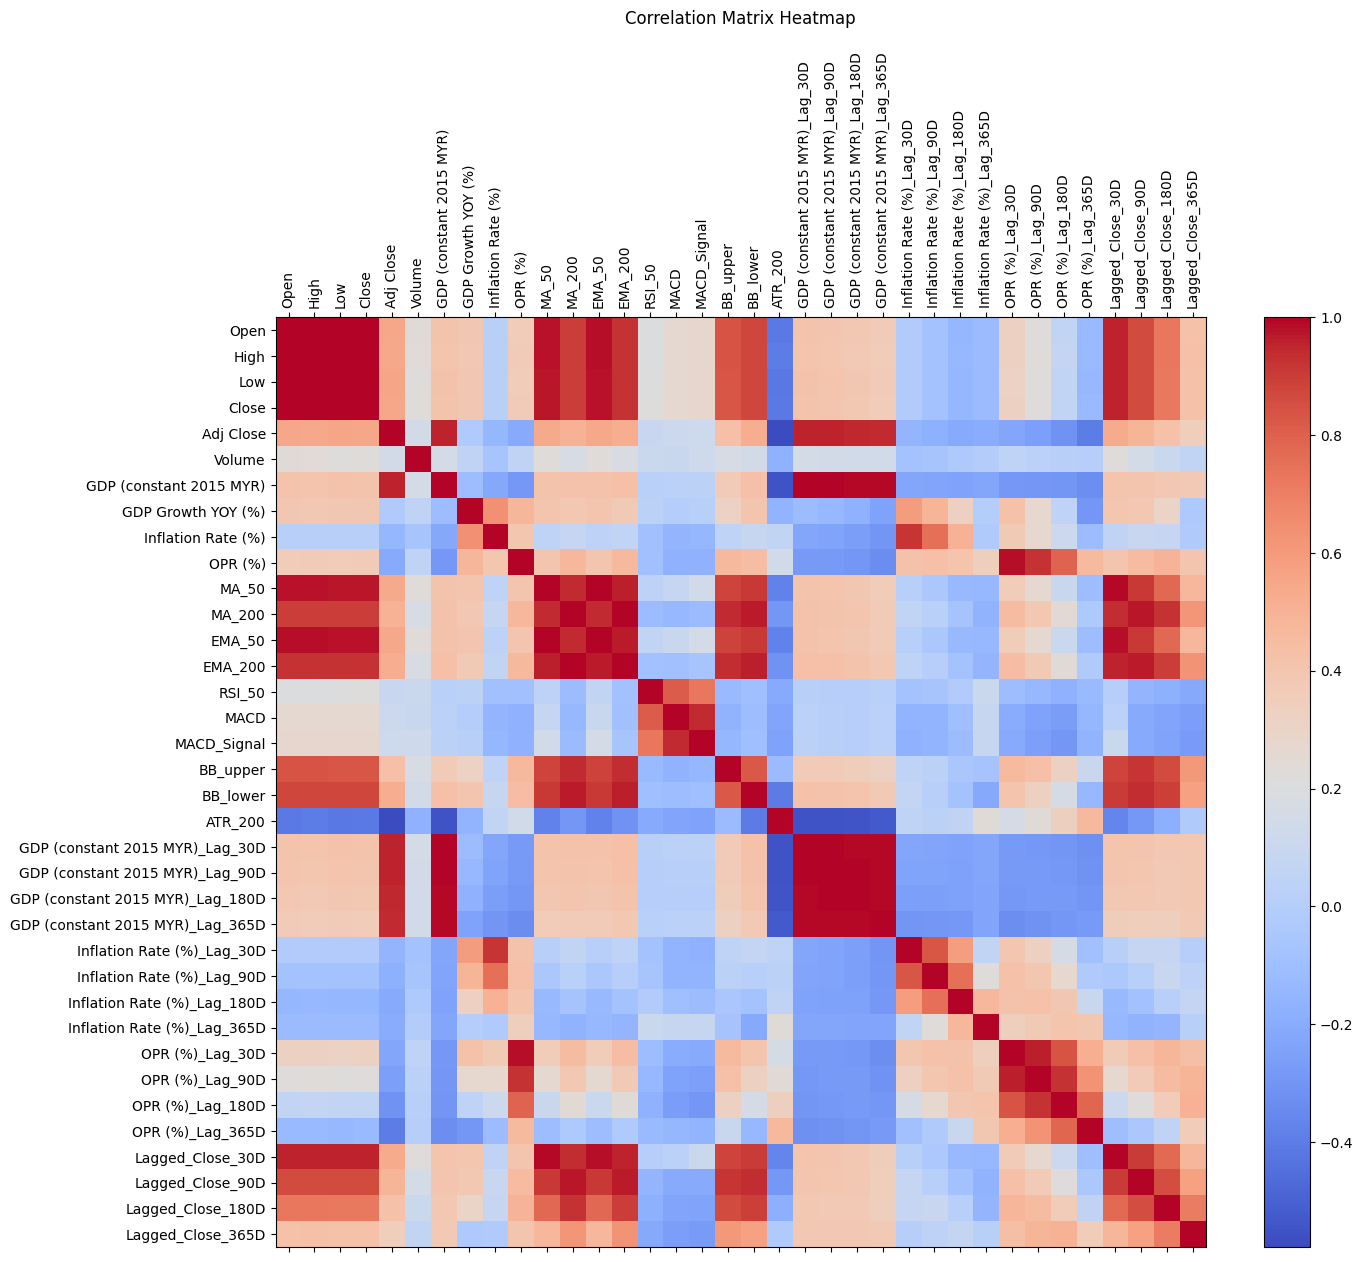

In [25]:
cols = combined_df.columns

correlation_matrix = combined_df[cols].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(15, 12))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix Heatmap", pad=20)
plt.show()

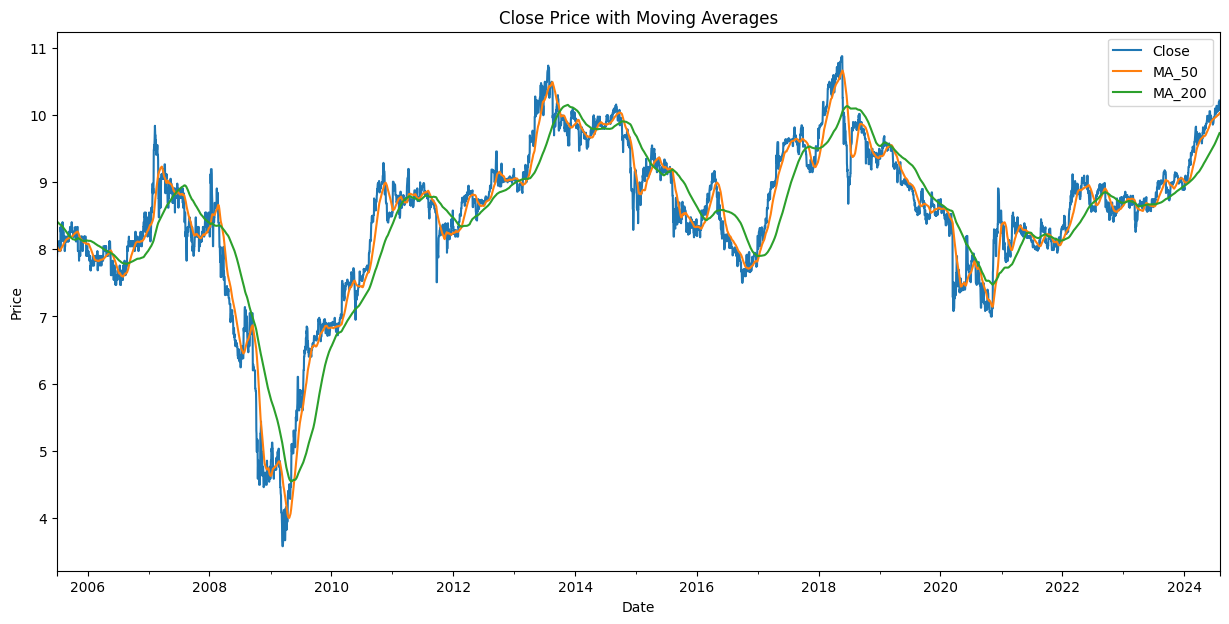

In [26]:
combined_df[['Close', 'MA_50', 'MA_200']].plot(figsize=(15, 7))
plt.title("Close Price with Moving Averages")
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(loc="best")
plt.show()


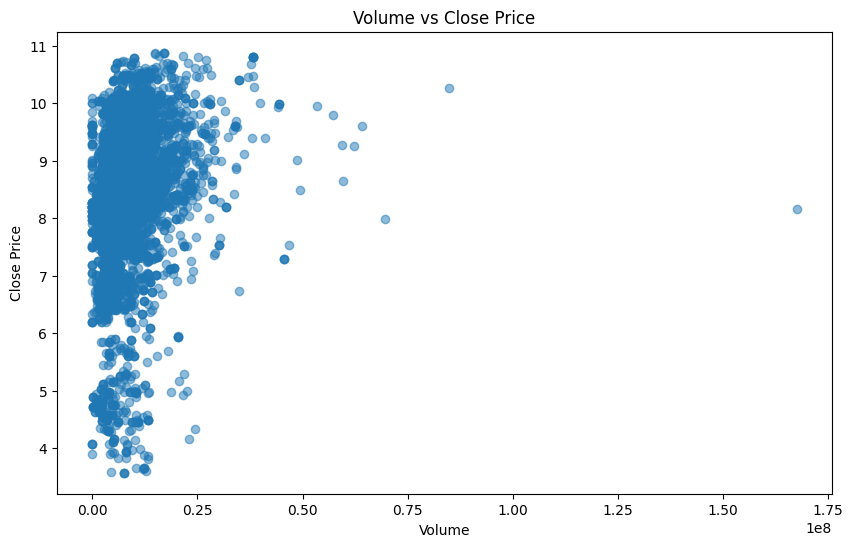

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['Volume'], combined_df['Close'], alpha=0.5)
plt.title("Volume vs Close Price")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.show()


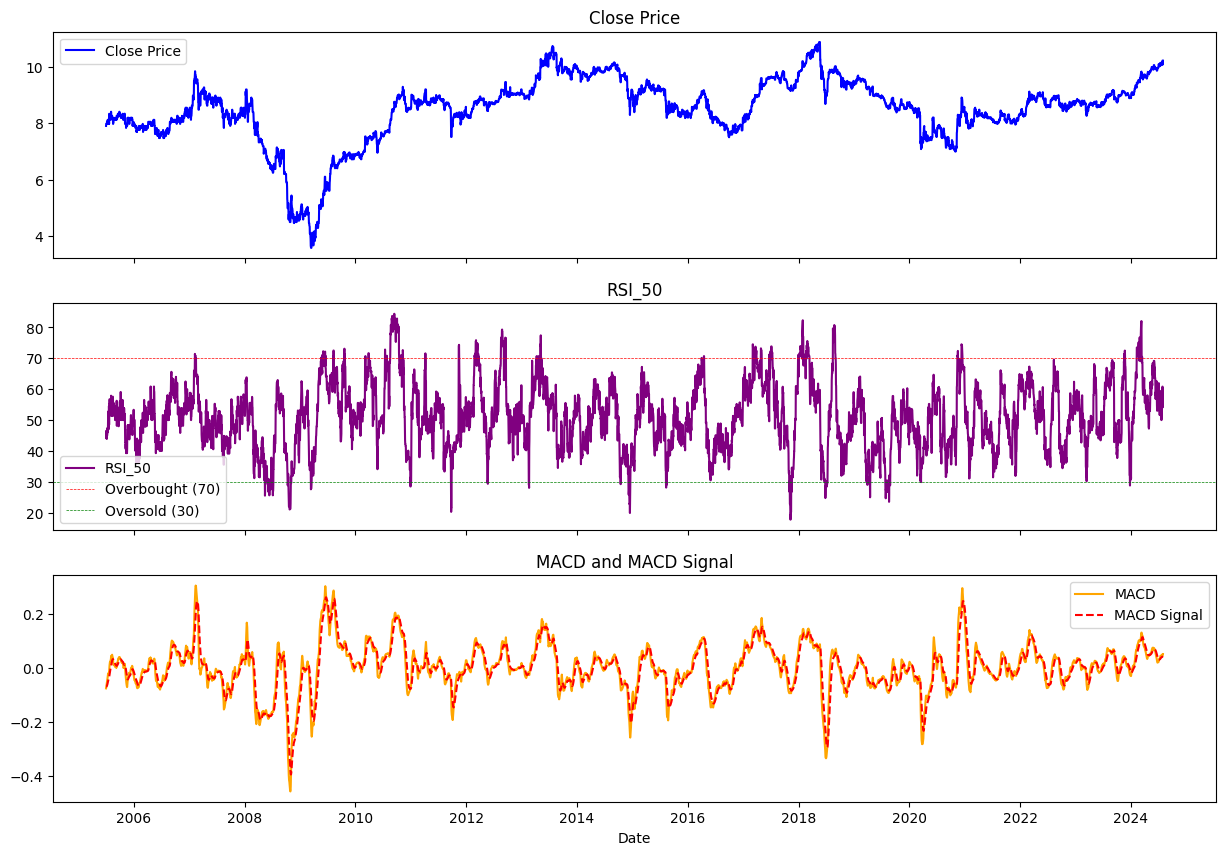

In [28]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

ax[0].plot(combined_df['Close'], label='Close Price', color='blue')
ax[0].set_title('Close Price')
ax[0].legend()

ax[1].plot(combined_df['RSI_50'], label='RSI_50', color='purple')
ax[1].axhline(70, color='red', linestyle='--', linewidth=0.5, label='Overbought (70)')
ax[1].axhline(30, color='green', linestyle='--', linewidth=0.5, label='Oversold (30)')
ax[1].set_title('RSI_50')
ax[1].legend()

ax[2].plot(combined_df['MACD'], label='MACD', color='orange')
ax[2].plot(combined_df['MACD_Signal'], label='MACD Signal', color='red', linestyle='--')
ax[2].set_title('MACD and MACD Signal')
ax[2].legend()

plt.xlabel('Date')
plt.show()


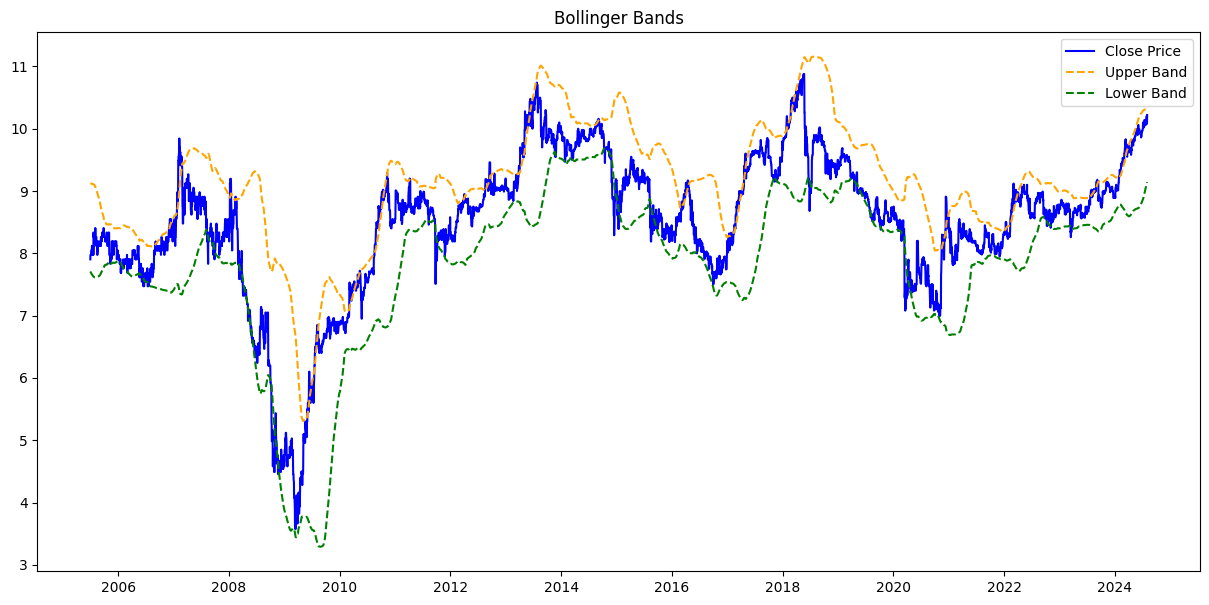

In [29]:
plt.figure(figsize=(15, 7))
plt.plot(combined_df['Close'], label='Close Price', color='blue')
plt.plot(combined_df['BB_upper'], label='Upper Band', color='orange', linestyle='--')
plt.plot(combined_df['BB_lower'], label='Lower Band', color='green', linestyle='--')
plt.title("Bollinger Bands")
plt.legend(loc="best")
plt.show()


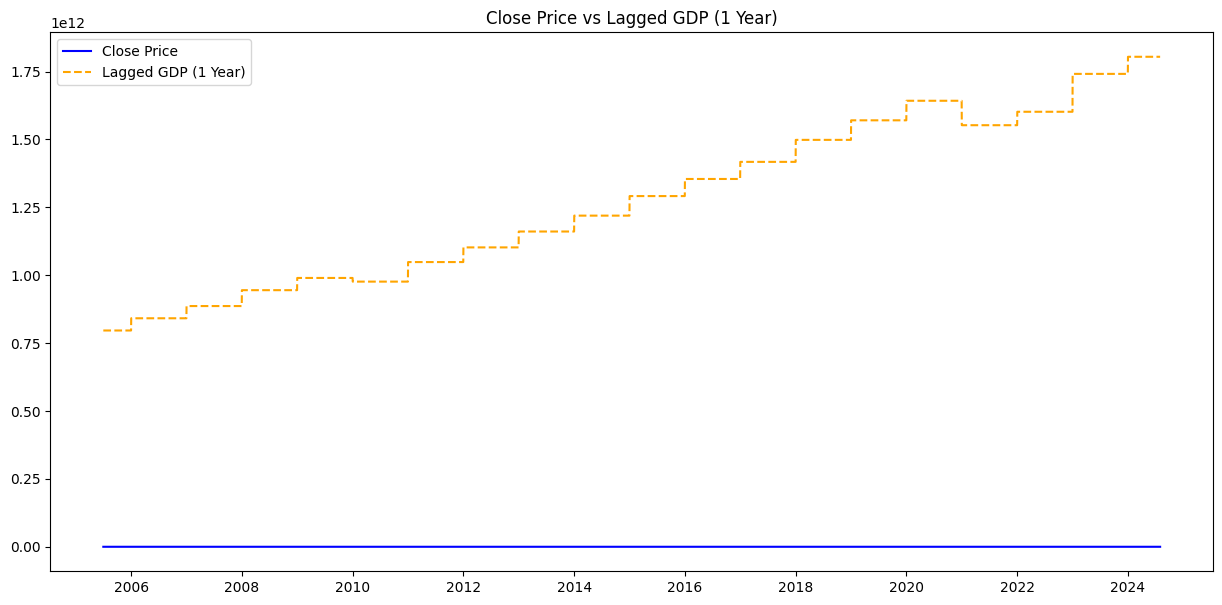

In [30]:
plt.figure(figsize=(15, 7))
plt.plot(combined_df['Close'], label='Close Price', color='blue')
plt.plot(combined_df['GDP (constant 2015 MYR)_Lag_365D'], label='Lagged GDP (1 Year)', color='orange', linestyle='--')
plt.title("Close Price vs Lagged GDP (1 Year)")
plt.legend(loc="best")
plt.show()


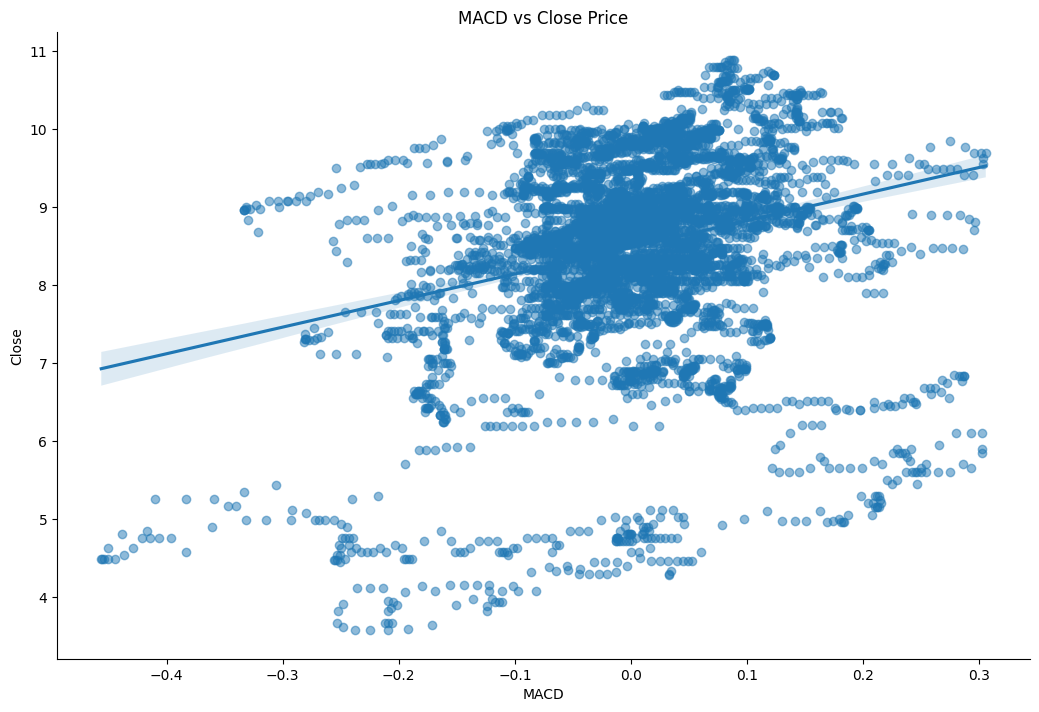

In [31]:
sns.lmplot(data=combined_df, x='MACD', y='Close', height=7, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title("MACD vs Close Price")
plt.show()


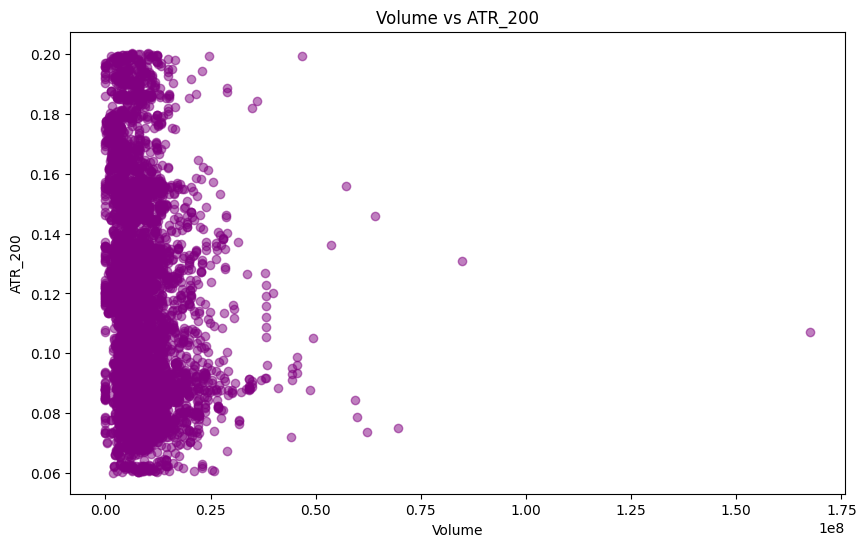

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['Volume'], combined_df['ATR_200'], alpha=0.5, color='purple')
plt.title("Volume vs ATR_200")
plt.xlabel("Volume")
plt.ylabel("ATR_200")
plt.show()


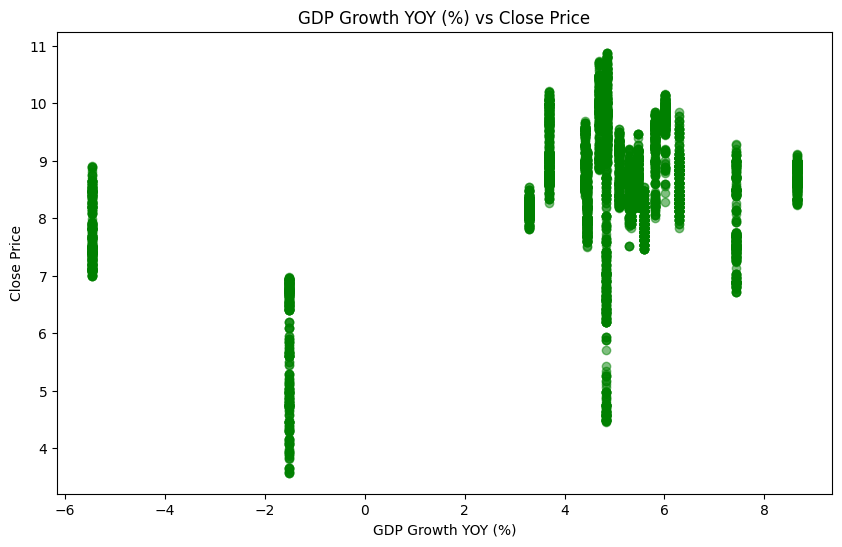

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['GDP Growth YOY (%)'], combined_df['Close'], alpha=0.5, color='green')
plt.title("GDP Growth YOY (%) vs Close Price")
plt.xlabel("GDP Growth YOY (%)")
plt.ylabel("Close Price")
plt.show()


In [34]:
target = 'Close'  # Replace with your target variable
correlations = combined_df[cols].corr()[target].sort_values(ascending=False)
print(correlations)
correlations.to_csv("data/corr.csv")


Close                               1.000000
High                                0.998793
Low                                 0.998703
Open                                0.997718
EMA_50                              0.981087
MA_50                               0.975055
Lagged_Close_30D                    0.954605
EMA_200                             0.921057
MA_200                              0.895357
BB_lower                            0.872403
Lagged_Close_90D                    0.859630
BB_upper                            0.832791
Lagged_Close_180D                   0.720930
Adj Close                           0.545624
Lagged_Close_365D                   0.423554
GDP (constant 2015 MYR)             0.411513
GDP (constant 2015 MYR)_Lag_30D     0.409525
GDP (constant 2015 MYR)_Lag_90D     0.399204
GDP Growth YOY (%)                  0.384532
GDP (constant 2015 MYR)_Lag_180D    0.379923
OPR (%)                             0.359391
GDP (constant 2015 MYR)_Lag_365D    0.357606
OPR (%)_La

In [35]:
from sklearn.ensemble import RandomForestRegressor

X = combined_df.drop(columns=['Close'])  # Replace 'Close' with your target variable
y = combined_df['Close']
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))


Low                                 0.570728
High                                0.329845
Adj Close                           0.093364
Open                                0.005305
RSI_50                              0.000099
Volume                              0.000083
ATR_200                             0.000060
BB_lower                            0.000053
Lagged_Close_365D                   0.000045
MACD_Signal                         0.000043
MA_50                               0.000037
MACD                                0.000034
EMA_50                              0.000033
Lagged_Close_90D                    0.000031
BB_upper                            0.000031
Lagged_Close_30D                    0.000031
Lagged_Close_180D                   0.000031
EMA_200                             0.000027
MA_200                              0.000025
Inflation Rate (%)_Lag_180D         0.000012
Inflation Rate (%)_Lag_90D          0.000010
Inflation Rate (%)_Lag_365D         0.000009
Inflation 

In [ ]:
cols_to_drop = [
    'Volume',
    'MACD',
    'MACD_Signal',
    'ATR_200',
    'Inflation Rate (%)',
    'Inflation Rate (%)_Lag_30D',
    'Inflation Rate (%)_Lag_90D',
    'Inflation Rate (%)_Lag_180D',
    'Inflation Rate (%)_Lag_365D',
    'OPR (%)_Lag_180D',
    'OPR (%)_Lag_365D',
    'Adj Close'
]

combined_df = combined_df.drop(columns=cols_to_drop)
print('New df columns: ', combined_df.columns)
print()
print('New df size: ', combined_df.shape)
print()
combined_df.to_csv("data/final_df.csv")

New df columns:  Index(['Open', 'High', 'Low', 'Close', 'GDP (constant 2015 MYR)',
       'GDP Growth YOY (%)', 'OPR (%)', 'MA_50', 'MA_200', 'EMA_50', 'EMA_200',
       'RSI_50', 'BB_upper', 'BB_lower', 'GDP (constant 2015 MYR)_Lag_30D',
       'GDP (constant 2015 MYR)_Lag_90D', 'GDP (constant 2015 MYR)_Lag_180D',
       'GDP (constant 2015 MYR)_Lag_365D', 'OPR (%)_Lag_30D',
       'OPR (%)_Lag_90D', 'Lagged_Close_30D', 'Lagged_Close_90D',
       'Lagged_Close_180D', 'Lagged_Close_365D'],
      dtype='object')

New df size (6971, 24)



In [37]:
final_df = pd.read_csv("data/final_df.csv")

In [40]:
# Calculate correlations with 6M_Return
correlation_matrix = final_df.corr()
high_corr_features = correlation_matrix['Close'].abs().sort_values(ascending=False).index[1:11]  # Top 10 features
print("Top 10 features correlated with Close: \n", high_corr_features.tolist())


Top 10 features correlated with Close: 
 ['High', 'Low', 'Open', 'EMA_50', 'MA_50', 'Lagged_Close_30D', 'EMA_200', 'MA_200', 'BB_lower', 'Lagged_Close_90D']


C:\Users\kh\AppData\Local\Temp\ipykernel_2812\697488543.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final_df.corr()
